In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import re
import seaborn as sns


# Functions for Pandas DFs

#### table with counts and % of unique values for a column

In [11]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
 # def function to show return table with count of unique values of a series 
def show_unique_count(df_name, column_name, digits = 2):
    
    count = df_name[column_name].value_counts(dropna=False)
    percentage = (df_name[column_name].value_counts \
                      (dropna=False, normalize=True) \
                      *100).round(digits)
    table = pd.concat([count,percentage],\
                    axis=1,\
                    keys=['counts', '%'])
    return(table)


In [13]:
show_unique_count(penguins, "sex")

,counts,%
MALE,168,48.84
FEMALE,165,47.97
NaN,11,3.20


# Functions for Sklearn

In [25]:
# preparing model
iris = sns.load_dataset("iris")
iris.head()
X = iris.drop(columns = "species")
y = iris["species"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y ,
                                                    random_state = 0)

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/Users/personal/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Function that prints scores of a classifier

In [52]:
def print_scores(model_name, X_train = X_train, X_test = X_test, y_test = y_test, y_train = y_train, avg = "binary"): 
# avg = binary is the default argument for the scores, but only works for binary outputs
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    
    print("Scores for default model on test set")
    print("")
    print('Accuracy Score : {}'.format(accuracy_score(y_test,model_name.predict(X_test))))
    print('Precision Score : {}'.format(precision_score(y_test,model_name.predict(X_test), average = avg)))
    print('Recall Score : {}' .format(recall_score(y_test,model_name.predict(X_test), average = avg)))
    print('F1 Score : {}'.format(f1_score(y_test,model_name.predict(X_test), average = avg)))
    
    print("")
    print("")
    print("Scores for default model on train set")
    print("")
    print('Accuracy Score : {}'.format(accuracy_score(y_train,model_name.predict(X_train))))
    print('Precision Score : {}'.format(precision_score(y_train,model_name.predict(X_train), average = avg)))
    print('Recall Score : {}' .format(recall_score(y_train,model_name.predict(X_train), average = avg)))
    print('F1 Score : {}'.format(f1_score(y_train,model_name.predict(X_train), average= avg)))

In [60]:
print_scores(clf, avg ="weighted") 

Scores for default model on test set

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


Scores for default model on train set

Accuracy Score : 0.9666666666666667
Precision Score : 0.9674185463659147
Recall Score : 0.9666666666666667
F1 Score : 0.9666458203043571


### Function that prints confusion matrix of a classifier

In [61]:
def show_confusion_matrix(model_name,X_train = X_train , X_test = X_test, y_test = y_test , y_train = y_train ): # def_function to show confusion_matrix

    import matplotlib.pyplot as plt 
    from sklearn.metrics import confusion_matrix

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 4))  

    ax1.set_title('Confusion Matrix of the test set')
    ax1.set_xlabel("Predicted Values")
    ax1.set_ylabel("Actual Values")
    
    ax2.set_title('Confusion Matrix of the train set')
    ax2.set_xlabel("Predicted Values")
    ax2.set_ylabel("Actual Values")
    
    cfm_test = confusion_matrix(y_test,model_name.predict(X_test))
    cfm_train = confusion_matrix(y_train,model_name.predict(X_train))
    sns.heatmap(cfm_test, annot=True, fmt="g", cmap="seismic", ax=ax1, )
    sns.heatmap(cfm_train, annot=True, fmt="g", cmap="seismic", ax=ax2)
    
    
    plt.tight_layout(), plt.show()

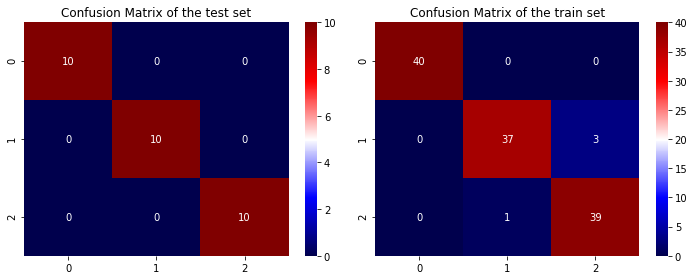

In [62]:
show_confusion_matrix(clf)